<a href="https://colab.research.google.com/github/tobp03/project-RA/blob/main/Lending%20Risk%20Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROGRAM SEMIFINAL STC LOGIKA UI 2024**
**NOMOR TIM :24-03-017-9**
* Ketua   : Toby Purbojo
* Anggota : Joseph Hansel

Secara garis besar program mengikuti urutan berikut:
1. Analisis dan pemrosesan data Payment History
2. Analisis dan pemrosesan data Previous Applications
3. Pembuatan dan analisis Kluster
4. Analisis dan pemrosesan data train
5. Penggabungan Data training dengan kluster
6. Pemodelan Data

**Import Dataset dan Library Python**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dataset (CSV)/train.csv", sep =",")
df = pd.read_csv("/content/drive/MyDrive/Dataset (CSV)/payment_history.csv", sep =",")

# **Analisis data Payment History**

Dataset memiliki ukuran (2871633, 7). Berdasarkan deskripsi data, ada beberapa kejanggalan data.

* AMT_INST terdapat nilai 0, artinya tidak ada tagihan. Hal ini mungkin perlu dipertimbangkan untuk di olah lebih lanjut
*  tagi terdapat nilai 0

Dengan mengamati variabel tersebut yang bernilai 0. Meskipun nilai pada variabel AMT_INST 0, terdapat pembayaran yang dilakukan. Akan di asumsikan bahwa nilai AMT_INST yang 0, lunas terbayar.

Sementara AMT_PAY yang nilai 0 dapat disebabkan karena, pembayaran sebuah installment dapat dilakukan lebih dari 1 kali. contohnya pada visualisasi di bawah, pembayaran installment 7 dilakukan dua kali



In [ ]:
df.shape

(2872306, 7)

In [ ]:
df

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000
...,...,...,...,...,...,...,...
2872301,1024845,407119,5,-224.0,-230.0,24819.660,24819.660
2872302,2597827,448211,18,-44.0,-44.0,915.795,915.795
2872303,2003162,450999,16,-2135.0,-2113.0,5414.265,5384.880
2872304,2149043,415032,9,-425.0,-434.0,46517.490,46517.490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872306 entries, 0 to 2872305
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SK_ID_PREV   int64  
 1   U_ID         int64  
 2   INST_NUMBER  int64  
 3   INST_DAYS    float64
 4   PAY_DAYS     float64
 5   AMT_INST     float64
 6   AMT_PAY      float64
dtypes: float64(4), int64(3)
memory usage: 153.4 MB


In [ ]:
df.describe()

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
count,2.872306e+06,2.872306e+06,2.872306e+06,2.872306e+06,2.871633e+06,2.872306e+06,2.871633e+06
mean,1.902798e+06,2.785208e+05,1.865887e+01,-1.039830e+03,-1.048684e+03,1.692881e+04,1.708792e+04
std,5.358735e+05,1.026814e+05,2.635638e+01,7.995411e+02,7.991129e+02,5.010468e+04,5.422172e+04
min,1.000020e+06,1.000090e+05,1.000000e+00,-2.922000e+03,-3.129000e+03,0.000000e+00,0.000000e+00
25%,1.435627e+06,1.893100e+05,4.000000e+00,-1.651000e+03,-1.659000e+03,4.199850e+03,3.389490e+03
50%,1.894453e+06,2.786890e+05,8.000000e+00,-8.170000e+02,-8.260000e+02,8.787330e+03,8.095050e+03
75%,2.368624e+06,3.675770e+05,1.900000e+01,-3.580000e+02,-3.670000e+02,1.661709e+04,1.597320e+04
max,2.843498e+06,4.562550e+05,2.250000e+02,-2.000000e+00,-2.000000e+00,3.371884e+06,3.371884e+06


In [ ]:
df[df['AMT_PAY']==0].sort_values(by='INST_NUMBER')

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
868278,2783804,242187,2,-2290.0,-2315.0,2250.0,0.0
953489,1761003,268744,2,-2220.0,-2250.0,6750.0,0.0
2310432,2652019,445660,2,-2196.0,-2204.0,9000.0,0.0
2027021,1974859,449538,2,-2480.0,-2486.0,6750.0,0.0
2304752,1798118,455496,2,-2193.0,-2217.0,9000.0,0.0
...,...,...,...,...,...,...,...
1727448,2246009,321055,43,-2312.0,-2337.0,4050.0,0.0
1442265,2397304,304240,44,-2291.0,-2321.0,6750.0,0.0
618314,2018068,140249,45,-2269.0,-2297.0,6750.0,0.0
529733,2018068,140249,47,-2208.0,-2236.0,6750.0,0.0


In [ ]:
df[df['SK_ID_PREV']==1410565].sort_values(by='INST_NUMBER')

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
3,1410565,197687,1,-1037.0,-1048.0,12514.05,12510.45
210513,1410565,197687,1,-1037.0,-1029.0,12514.05,3.60
518442,1410565,197687,2,-1007.0,-1008.0,12514.05,12514.05
515237,1410565,197687,3,-977.0,-980.0,12514.05,12514.05
150298,1410565,197687,4,-947.0,-948.0,12514.05,12514.05
236477,1410565,197687,5,-917.0,-920.0,12514.05,12514.05
503180,1410565,197687,6,-887.0,-920.0,12450.51,12450.51


{'whiskers': [<matplotlib.lines.Line2D at 0x78737b92a0b0>,
 'caps': [<matplotlib.lines.Line2D at 0x78737b92a260>,
 'boxes': [<matplotlib.lines.Line2D at 0x78737b929bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x78737b928880>,
 'fliers': [<matplotlib.lines.Line2D at 0x78737b9293c0>,
 'means': []}

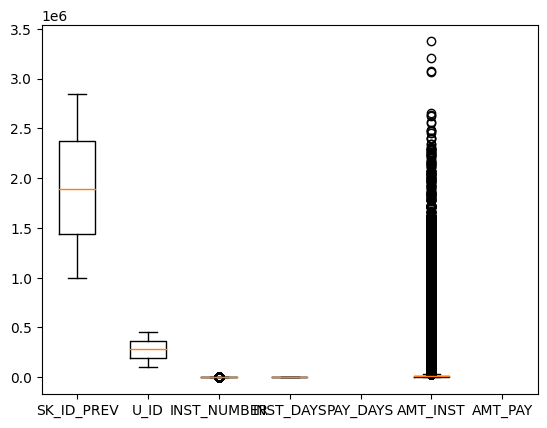

In [ ]:
plt.boxplot(df.values, labels=df.columns)

### **Periksa data kosong**

Data juga terdapat sebanyak 673 nilai kosong pada kolom PAY_DAYS dan AMT_PAY. Nilai yang kosong ada pada baris yang sama. Karena jumlah yang tidak terlalu signifikan, baris yang terdapat nilai Na akan di abaikan.

In [ ]:
df.isna().sum()

SK_ID_PREV       0
U_ID             0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64

In [ ]:
df[df['PAY_DAYS'].isna()]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
645595,1265332,167942,5,-14.0,NaN,11650.500,NaN
645596,2776343,151961,31,-2.0,NaN,15097.275,NaN
645597,2312379,107766,46,-1464.0,NaN,67.500,NaN
645598,1319969,133112,22,-58.0,NaN,33089.310,NaN
645599,1153254,120931,26,-1440.0,NaN,67.500,NaN
...,...,...,...,...,...,...,...
2872080,1666631,429716,38,-1797.0,NaN,67.500,NaN
2872081,1280188,435393,35,-1678.0,NaN,67.500,NaN
2872192,2682640,418699,1,-24.0,NaN,42419.205,NaN
2872193,1766391,413446,45,-1668.0,NaN,67.500,NaN


In [ ]:
df = df.dropna()

### **Preprocessing data**

Dataset dilakukan groupby aggregate. Aggregation dilakukan berdasarkan kolom ['SK_ID_PREV','U_ID', 'INST_NUMBER'] dengan tujuan untuk menjumlahkan pembayaran installment yang sama lebih dari satu kali. Seperti yang ditemukan pada bagian sebelumnya

In [ ]:
df2 = df.groupby(['SK_ID_PREV','U_ID', 'INST_NUMBER']).agg({'INST_DAYS': 'last','PAY_DAYS': 'last','AMT_INST': 'first', 'AMT_PAY': 'sum'}).reset_index().copy()
#df2 = df.groupby(['SK_ID_PREV', 'INST_NUMBER']).agg({'U_ID': 'first','INST_DAYS': 'first','PAY_DAYS': 'first','AMT_INST': 'first', 'AMT_PAY': 'sum'}).copy()

In [ ]:
#Pembulatan data
df2['AMT_INST']=df2['AMT_INST'].round(2)
df2['AMT_PAY']=df2['AMT_PAY'].round(2)

Feature engineering, membuat variabel baru yaitu unpaid debt. Dihitung selisih dari AMT_INST dan AMT_PAY yang telah diaggregasi, untuk menentukan jumlah hutang pada setiap installment. Kurang bayar ditoleransikan sebesar 0.1 satuan.

Berdasarkan variabel baru, ditemukan ada sebanyak 674 installment yang ada kurang bayar

In [ ]:
df2['unpaid_debt'] = df2['AMT_INST'] - df2['AMT_PAY']
df2['unpaid_debt'] = df2['unpaid_debt'].apply(lambda x: max(0, x))
#df2['FULLY_PAYED'] = np.where(df2['AMT_INST']==df2['AMT_PAY'],1,0) #Nilai 1 jika udah terbayar sepenuhnya, 0 jika tidak

In [ ]:
df2[df2['unpaid_debt']>0]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,unpaid_debt
1042,1000506,326447,11,-1657.0,-1687.0,9665.33,9665.32,0.01
1464,1000732,166562,7,-822.0,-819.0,16330.82,16330.81,0.01
1468,1000732,166562,11,-702.0,-697.0,16330.82,16330.81,0.01
1929,1000859,314738,36,-1449.0,-1476.0,67.50,19.80,47.70
2333,1000954,378082,3,-549.0,-578.0,51849.32,51849.31,0.01
...,...,...,...,...,...,...,...,...
2711547,2842285,112030,3,-469.0,-503.0,27926.60,27926.59,0.01
2711811,2842431,431245,1,-1088.0,-1097.0,18222.62,18222.61,0.01
2712399,2842725,319595,7,-1692.0,-1670.0,2588.18,2588.17,0.01
2712654,2842861,370469,6,-703.0,-701.0,26704.76,26704.75,0.01


In [ ]:
df2

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,unpaid_debt
0,1000020,299072,1,-1986.0,-2000.0,18393.16,18393.16,0.0
1,1000020,299072,2,-1956.0,-1973.0,18393.16,18393.16,0.0
2,1000020,299072,3,-1926.0,-1941.0,18393.16,18393.16,0.0
3,1000020,299072,4,-1896.0,-1912.0,18393.16,18393.16,0.0
4,1000020,299072,5,-1866.0,-1882.0,18393.16,18393.16,0.0
...,...,...,...,...,...,...,...,...
2714154,2843498,393881,2,-1412.0,-1424.0,16191.99,16191.99,0.0
2714155,2843498,393881,3,-1382.0,-1395.0,16191.99,16191.99,0.0
2714156,2843498,393881,4,-1352.0,-1367.0,16191.99,16191.99,0.0
2714157,2843498,393881,5,-1322.0,-1336.0,16191.99,16191.99,0.0


Pembuatan variabel baru untuk menghitung jumlah hari telat bayar.

Berdasarkan variabel tersebut, terdapat sebanyak 174369 installment yang ada telat bayar.

In [ ]:
df2['days_late'] = df2['PAY_DAYS'] - df2['INST_DAYS']
df2['days_late'] = df2['days_late'].apply(lambda x: max(0, x))

In [ ]:
df2[df2['SK_ID_PREV']==1410565]

,SK_ID_PREV,U_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,unpaid_debt,days_late
640765,1410565,197687,1,-1037.0,-1029.0,12514.05,12514.05,0.0,8.0
640766,1410565,197687,2,-1007.0,-1008.0,12514.05,12514.05,0.0,0.0
640767,1410565,197687,3,-977.0,-980.0,12514.05,12514.05,0.0,0.0
640768,1410565,197687,4,-947.0,-948.0,12514.05,12514.05,0.0,0.0
640769,1410565,197687,5,-917.0,-920.0,12514.05,12514.05,0.0,0.0
640770,1410565,197687,6,-887.0,-920.0,12450.51,12450.51,0.0,0.0


Kemudian, akan dilakukan groupby aggregasi untuk menjumlahkan setiap installment untuk no ID unik

In [ ]:
df3 = df2.groupby(['SK_ID_PREV','U_ID']).agg({'INST_NUMBER': 'count','unpaid_debt': 'sum','days_late': 'sum'}).reset_index().copy()
df3 = df3.rename(columns={'INST_NUMBER': 'num_inst'})

In [ ]:
df3.shape

(211711, 5)

In [ ]:
df3.nunique()

SK_ID_PREV     211711
U_ID            72299
num_inst          198
unpaid_debt       699
days_late         852
dtype: int64

In [ ]:
df3.head()

,SK_ID_PREV,U_ID,num_inst,unpaid_debt,days_late
0,1000020,299072,12,0.0,0.0
1,1000023,350748,4,0.0,0.0
2,1000024,448518,12,0.0,0.0
3,1000026,227096,4,0.0,0.0
4,1000027,277601,6,0.0,0.0


# **Analisis Data previous applications**

Berdasarkan data ini, data akan difilter berdasarkan CONTRACT_STATUS yang nilainya Approved saja.

In [ ]:
df_loan = pd.read_csv("/content/drive/MyDrive/Dataset (CSV)/previous_applications.csv", sep =",")

In [ ]:
df_loan

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350707,1379569,309506,Cash loans,33389.100,1035000.0,1035000.0,NaN,1035000.0,THURSDAY,10,Refused,-156,60.0,low_normal,NaN,NaN,NaN,NaN
350708,1252861,363895,Cash loans,56754.000,1350000.0,1350000.0,NaN,1350000.0,THURSDAY,16,Refused,-847,48.0,middle,NaN,NaN,NaN,NaN
350709,1379406,302265,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13,Canceled,-502,NaN,NA1,NaN,NaN,NaN,NaN
350710,2698899,161204,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,13,Canceled,-359,NaN,NA1,NaN,NaN,NaN,NaN


In [ ]:
df_loan = df_loan[df_loan['CONTRACT_STATUS']=='Approved']

Berdasarkan data ini, beberapa variabel yang diduga memiliki peran penting untuk menentuk risk assesment sebuah nasabah adalah:
* Jumlah limit yang diberikan kepada nasabah
* Jumlah interest yang diberikan kepada nasab
* Asuransi dari pinjaman

Jumlah interest yang diberikan ada pada variabel YIELD_GROUP. Asuransi dari pinjaman ada pada NFLAG_INSURED_ON_APPROVAL.

Sementara, jumlah yang diberikan kepada nasabah ada pada variabel APPLICATION dan APPROVED_CREDIT.


## **Eksplorasi**

Ditemukan terdapat sebanyak 8280 data kosong pada variabel NFLAG_INSURED_ON_APPROVAL. Selain itu, APPLICATION dan APPROVED_CREDIT terdapat nilai nol

In [ ]:
df_loan.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.196870e+05,219687.000000,219685.000000,2.196870e+05,2.196870e+05,1.408600e+05,2.104650e+05,219687.000000,219687.000000,219685.000000,211407.000000,211407.000000,211407.000000,211407.000000
mean,1.904350e+06,278373.284286,14585.846247,1.794100e+05,2.014853e+05,6.832135e+03,1.872712e+05,12.602648,-1097.152235,14.171819,342238.632122,13228.355887,82378.742109,0.331980
std,5.353069e+05,102659.397670,13626.136079,2.536923e+05,2.755490e+05,1.853554e+04,2.563351e+05,3.319055,792.382703,12.014098,88866.480608,71030.663471,153553.036032,0.470925
min,1.000020e+06,100009.000000,0.000000,0.000000e+00,0.000000e+00,-4.500000e-01,0.000000e+00,0.000000,-2922.000000,0.000000,-2922.000000,-2892.000000,-2845.000000,0.000000
25%,1.435808e+06,189444.000000,5883.345000,4.500000e+04,4.743450e+04,0.000000e+00,4.594050e+04,10.000000,-1638.000000,6.000000,365243.000000,-1625.000000,-1267.000000,0.000000
50%,1.896829e+06,278740.000000,10277.775000,9.000000e+04,1.007640e+05,2.295000e+03,9.517950e+04,12.000000,-856.000000,12.000000,365243.000000,-825.000000,-495.000000,0.000000
75%,2.369940e+06,367237.000000,18119.700000,1.914165e+05,2.250000e+05,8.280000e+03,2.025000e+05,15.000000,-454.000000,18.000000,365243.000000,-408.000000,-43.000000,1.000000
max,2.843498e+06,456255.000000,233175.870000,4.050000e+06,4.050000e+06,2.025000e+06,4.050000e+06,23.000000,-2.000000,84.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
df_loan.isna().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                     2
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT             78827
PRODUCT_PRICE                 9222
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                     2
YIELD_GROUP                      0
FIRST_DRAW                    8280
FIRST_DUE                     8280
TERMINATION                   8280
NFLAG_INSURED_ON_APPROVAL     8280
dtype: int64

In [ ]:
df_loan.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.196870e+05,219687.000000,219685.000000,2.196870e+05,2.196870e+05,1.408600e+05,2.104650e+05,219687.000000,219687.000000,219685.000000,211407.000000,211407.000000,211407.000000,211407.000000
mean,1.904350e+06,278373.284286,14585.846247,1.794100e+05,2.014853e+05,6.832135e+03,1.872712e+05,12.602648,-1097.152235,14.171819,342238.632122,13228.355887,82378.742109,0.331980
std,5.353069e+05,102659.397670,13626.136079,2.536923e+05,2.755490e+05,1.853554e+04,2.563351e+05,3.319055,792.382703,12.014098,88866.480608,71030.663471,153553.036032,0.470925
min,1.000020e+06,100009.000000,0.000000,0.000000e+00,0.000000e+00,-4.500000e-01,0.000000e+00,0.000000,-2922.000000,0.000000,-2922.000000,-2892.000000,-2845.000000,0.000000
25%,1.435808e+06,189444.000000,5883.345000,4.500000e+04,4.743450e+04,0.000000e+00,4.594050e+04,10.000000,-1638.000000,6.000000,365243.000000,-1625.000000,-1267.000000,0.000000
50%,1.896829e+06,278740.000000,10277.775000,9.000000e+04,1.007640e+05,2.295000e+03,9.517950e+04,12.000000,-856.000000,12.000000,365243.000000,-825.000000,-495.000000,0.000000
75%,2.369940e+06,367237.000000,18119.700000,1.914165e+05,2.250000e+05,8.280000e+03,2.025000e+05,15.000000,-454.000000,18.000000,365243.000000,-408.000000,-43.000000,1.000000
max,2.843498e+06,456255.000000,233175.870000,4.050000e+06,4.050000e+06,2.025000e+06,4.050000e+06,23.000000,-2.000000,84.000000,365243.000000,365243.000000,365243.000000,1.000000


Sebagian besar nilai nol dari variabel APPLICATION dan APPROVED_CREDIT ditemukan pada contract type revolving loan. Revolving loan merupakan pinjaman seperti kredit card, di kasih limit tapi bisa pinjam berkali2.

In [ ]:
df_loan[df_loan['APPROVED_CREDIT']==0]

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
1522,1864442,403907,Revolving loans,0.0,0.0,0.0,NaN,0.0,SUNDAY,9,Approved,-292,0.0,NA1,-292.0,365243.0,-164.0,0.0
2364,2436524,240258,Revolving loans,0.0,0.0,0.0,NaN,0.0,SATURDAY,8,Approved,-283,0.0,NA1,-283.0,365243.0,365243.0,0.0
2439,2788241,285868,Revolving loans,0.0,0.0,0.0,NaN,0.0,SATURDAY,15,Approved,-272,0.0,NA1,-272.0,365243.0,365243.0,0.0
5777,2768260,197786,Revolving loans,0.0,0.0,0.0,NaN,0.0,TUESDAY,13,Approved,-288,0.0,NA1,-288.0,-212.0,365243.0,0.0
5912,1411040,400753,Revolving loans,0.0,0.0,0.0,NaN,0.0,THURSDAY,10,Approved,-313,0.0,NA1,-313.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345428,2558306,416849,Revolving loans,0.0,0.0,0.0,NaN,NaN,MONDAY,11,Approved,-1681,0.0,NA1,-1670.0,365243.0,-947.0,0.0
347247,2119261,432747,Revolving loans,0.0,0.0,0.0,NaN,0.0,MONDAY,9,Approved,-357,0.0,NA1,-357.0,365243.0,365243.0,0.0
348250,1067831,180317,Revolving loans,0.0,0.0,0.0,NaN,0.0,WEDNESDAY,12,Approved,-17,0.0,NA1,365243.0,365243.0,365243.0,0.0
349202,2714818,412963,Revolving loans,0.0,0.0,0.0,NaN,0.0,SATURDAY,14,Approved,-376,0.0,NA1,-376.0,365243.0,-341.0,0.0


array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'U_ID'}>,
        <Axes: title={'center': 'LOAN_ANNUITY'}>,
        <Axes: title={'center': 'APPLICATION'}>],
       [<Axes: title={'center': 'APPROVED_CREDIT'}>,
        <Axes: title={'center': 'AMT_DOWN_PAYMENT'}>,
        <Axes: title={'center': 'PRODUCT_PRICE'}>,
        <Axes: title={'center': 'APPLY_HOUR'}>],
       [<Axes: title={'center': 'DAYS_DECISION'}>,
        <Axes: title={'center': 'TERM_PAYMENT'}>,
        <Axes: title={'center': 'FIRST_DRAW'}>,
        <Axes: title={'center': 'FIRST_DUE'}>],
       [<Axes: title={'center': 'TERMINATION'}>,
        <Axes: title={'center': 'NFLAG_INSURED_ON_APPROVAL'}>, <Axes: >,
        <Axes: >]], dtype=object)

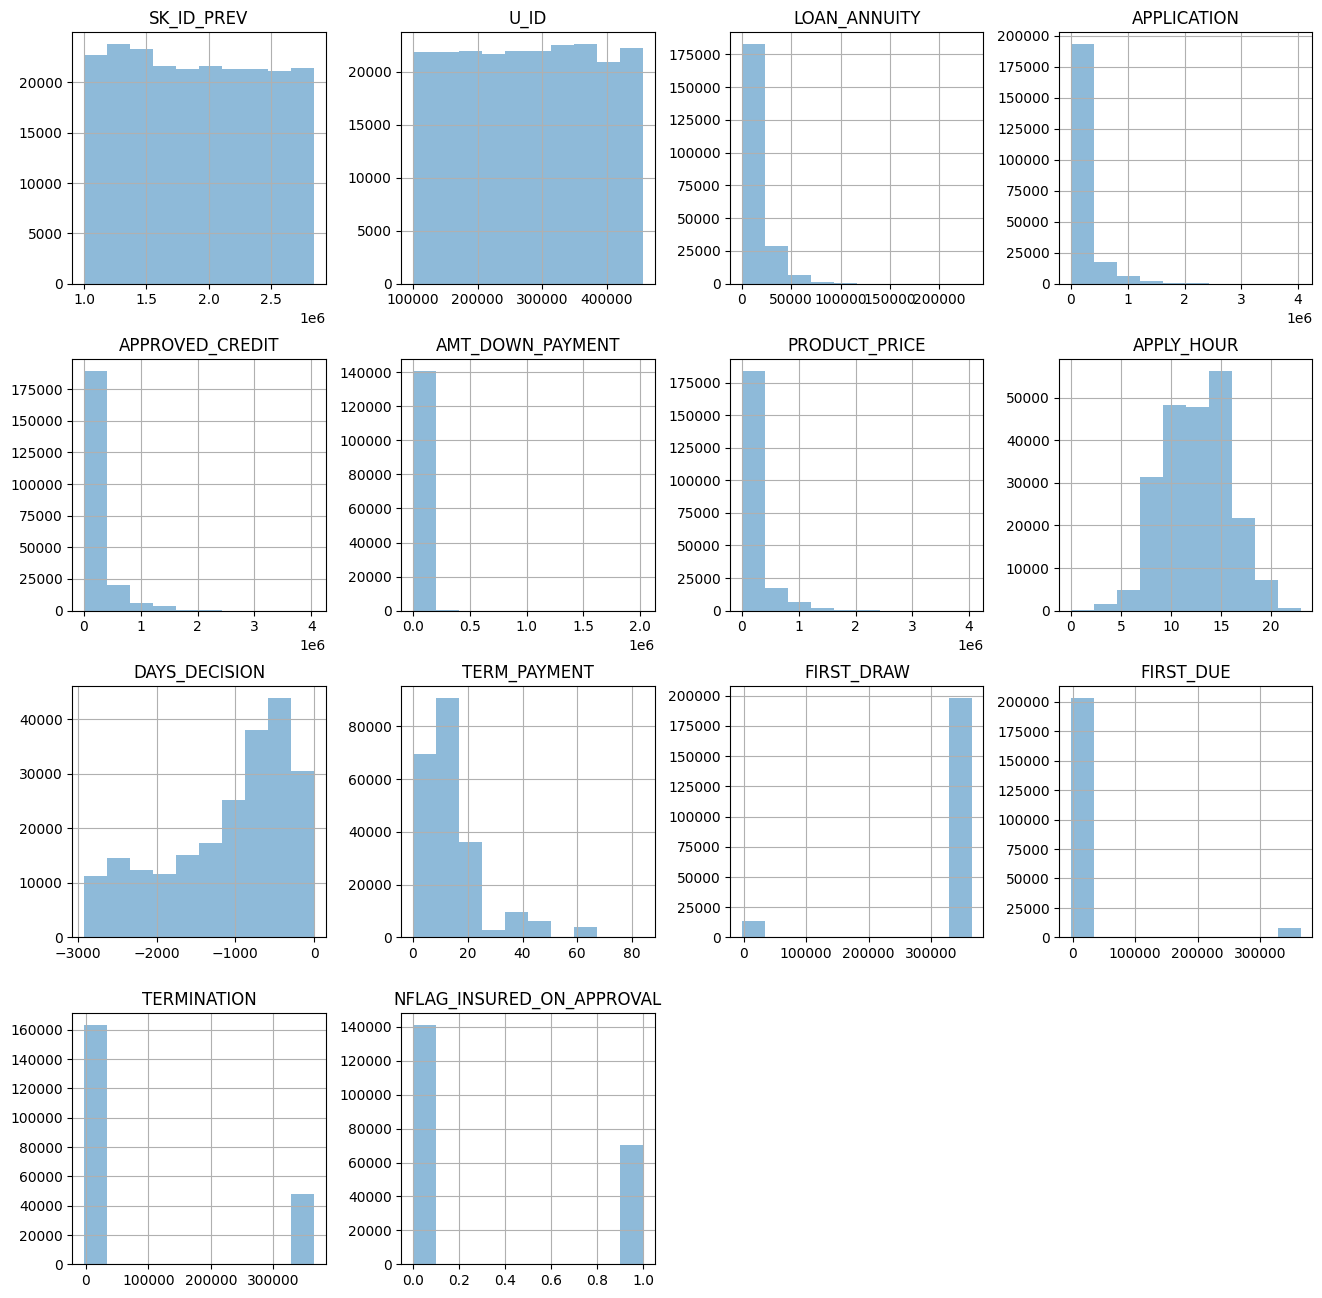

In [ ]:
df_loan.hist(figsize=(16, 16), bins=10, alpha=0.5)

## **Feature engineering**

Berdasarkan eksplorasi data, kita punya
* data kosong variabel insured 8280
* Terdapat nilai nol untuk APPLICATION dan APPROVED_CREDIT.

Pertama unutk variabel mengenai asuransi, data kosong adalah sebanyak sekitar 4% dari seluruh data. Menurut kami ini variabel yang penting untuk pertimbangan risk assesment. Akan dilakukan imputasi data berdasarkan data terbanyak

In [ ]:
mode_value = df_loan['NFLAG_INSURED_ON_APPROVAL'].mode()[0]
df_loan['NFLAG_INSURED_ON_APPROVAL'] = df_loan['NFLAG_INSURED_ON_APPROVAL'].fillna(mode_value)

<ipython-input-147-23b3bf3d33bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['NFLAG_INSURED_ON_APPROVAL'] = df_loan['NFLAG_INSURED_ON_APPROVAL'].fillna(mode_value)


In [ ]:
df_loan.isna().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                     2
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT             78827
PRODUCT_PRICE                 9222
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                     2
YIELD_GROUP                      0
FIRST_DRAW                    8280
FIRST_DUE                     8280
TERMINATION                   8280
NFLAG_INSURED_ON_APPROVAL        0
dtype: int64

In [ ]:
df_loan

,SK_ID_PREV,U_ID,CONTRACT_TYPE,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_DAYS,APPLY_HOUR,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.00,17145.0,0.00,17145.00,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,2819243,176158,Cash loans,47041.335,450000.00,470790.0,NaN,450000.00,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,1383531,199383,Cash loans,23703.930,315000.00,340573.5,NaN,315000.00,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
4,1715995,447712,Cash loans,11368.620,270000.00,335754.0,NaN,270000.00,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
5,1151694,161591,Consumer loans,39111.075,214380.00,209497.5,13500.00,214380.00,FRIDAY,12,Approved,-989,6.0,middle,365243.0,-958.0,-804.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350691,2526478,451763,Cash loans,31170.645,720000.00,806485.5,NaN,720000.00,TUESDAY,10,Approved,-1071,42.0,low_normal,365243.0,-1041.0,-527.0,1.0
350692,1492303,348082,Cash loans,101793.555,990000.00,1018750.5,NaN,990000.00,WEDNESDAY,4,Approved,-568,12.0,middle,365243.0,-538.0,-200.0,1.0
350695,1229904,280109,Consumer loans,14490.360,140754.24,153013.5,3.24,140754.24,TUESDAY,14,Approved,-1301,12.0,low_normal,365243.0,-1270.0,-967.0,0.0
350697,1883185,418537,Cash loans,10751.985,90000.00,95940.0,0.00,90000.00,FRIDAY,10,Approved,-2199,12.0,high,365243.0,-2169.0,-1833.0,1.0


Selanjutnya, berdasarkan APPLICATION dan APPROVED_CREDIT. Akan dibuat ratio antara jumlah credit yang diberikan terhadap permintaan jumlah kredit.

Untuk data yang kosong, terutama pada contract type revolving loan. Credit ratio akan dianggap sebagai 1.

Nilai variabel ini dapat diinterpretasikan jika ratio tinggi, bank memberikan pinjaman yang lebih dari yang diminta dari nasabah

In [ ]:
df_loan['credit_ratio'] = df_loan['APPROVED_CREDIT']/df_loan['PRODUCT_PRICE']

<ipython-input-150-ea7d829b96fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['credit_ratio'] = df_loan['APPROVED_CREDIT']/df_loan['PRODUCT_PRICE']


In [ ]:
df_loan['credit_ratio'] = df_loan['credit_ratio'].replace(np.inf,1)
df_loan['credit_ratio'] = df_loan['credit_ratio'].fillna(1)

<ipython-input-151-d1f66696e0af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['credit_ratio'] = df_loan['credit_ratio'].replace(np.inf,1)
<ipython-input-151-d1f66696e0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['credit_ratio'] = df_loan['credit_ratio'].fillna(1)


In [ ]:
df_loan.describe()

,SK_ID_PREV,U_ID,LOAN_ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRODUCT_PRICE,APPLY_HOUR,DAYS_DECISION,TERM_PAYMENT,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,credit_ratio
count,2.196870e+05,219687.000000,219685.000000,2.196870e+05,2.196870e+05,1.408600e+05,2.104650e+05,219687.000000,219687.000000,219685.000000,211407.000000,211407.000000,211407.000000,219687.000000,219687.000000
mean,1.904350e+06,278373.284286,14585.846247,1.794100e+05,2.014853e+05,6.832135e+03,1.872712e+05,12.602648,-1097.152235,14.171819,342238.632122,13228.355887,82378.742109,0.319468,1.020171
std,5.353069e+05,102659.397670,13626.136079,2.536923e+05,2.755490e+05,1.853554e+04,2.563351e+05,3.319055,792.382703,12.014098,88866.480608,71030.663471,153553.036032,0.466272,0.132606
min,1.000020e+06,100009.000000,0.000000,0.000000e+00,0.000000e+00,-4.500000e-01,0.000000e+00,0.000000,-2922.000000,0.000000,-2922.000000,-2892.000000,-2845.000000,0.000000,0.058824
25%,1.435808e+06,189444.000000,5883.345000,4.500000e+04,4.743450e+04,0.000000e+00,4.594050e+04,10.000000,-1638.000000,6.000000,365243.000000,-1625.000000,-1267.000000,0.000000,0.974218
50%,1.896829e+06,278740.000000,10277.775000,9.000000e+04,1.007640e+05,2.295000e+03,9.517950e+04,12.000000,-856.000000,12.000000,365243.000000,-825.000000,-495.000000,0.000000,1.000000
75%,2.369940e+06,367237.000000,18119.700000,1.914165e+05,2.250000e+05,8.280000e+03,2.025000e+05,15.000000,-454.000000,18.000000,365243.000000,-408.000000,-43.000000,1.000000,1.099000
max,2.843498e+06,456255.000000,233175.870000,4.050000e+06,4.050000e+06,2.025000e+06,4.050000e+06,23.000000,-2.000000,84.000000,365243.000000,365243.000000,365243.000000,1.000000,2.740852


<Axes: >

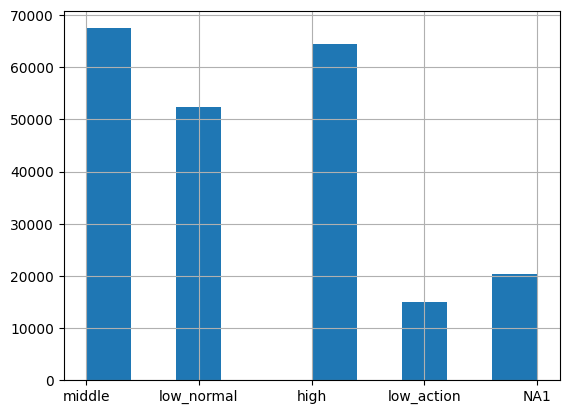

In [ ]:
df_loan['YIELD_GROUP'].hist()

In [ ]:
df_loan['YIELD_GROUP'] = df_loan['YIELD_GROUP'].replace('NA1', 'middle')

<ipython-input-154-083ade760070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['YIELD_GROUP'] = df_loan['YIELD_GROUP'].replace('NA1', 'middle')


In [ ]:
df_loan.isna().sum()

SK_ID_PREV                       0
U_ID                             0
CONTRACT_TYPE                    0
LOAN_ANNUITY                     2
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT             78827
PRODUCT_PRICE                 9222
APPLY_DAYS                       0
APPLY_HOUR                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                     2
YIELD_GROUP                      0
FIRST_DRAW                    8280
FIRST_DUE                     8280
TERMINATION                   8280
NFLAG_INSURED_ON_APPROVAL        0
credit_ratio                     0
dtype: int64

In [ ]:
df_loan[['SK_ID_PREV','credit_ratio','NFLAG_INSURED_ON_APPROVAL','YIELD_GROUP']]

,SK_ID_PREV,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP
0,2030495,1.000000,0.0,middle
1,2819243,1.046200,1.0,middle
2,1383531,1.081186,1.0,low_normal
4,1715995,1.243533,1.0,low_normal
5,1151694,0.977225,0.0,middle
...,...,...,...,...
350691,2526478,1.120119,1.0,low_normal
350692,1492303,1.029041,1.0,middle
350695,1229904,1.087097,0.0,low_normal
350697,1883185,1.066000,1.0,high


# **Pembuatan variabel baru + Clustering**

In [ ]:
merged_df = pd.merge(df3, df_loan[['SK_ID_PREV','credit_ratio','NFLAG_INSURED_ON_APPROVAL','YIELD_GROUP']], on='SK_ID_PREV', how='left')

In [ ]:
merged_df.isna().sum()

SK_ID_PREV                      0
U_ID                            0
num_inst                        0
unpaid_debt                     0
days_late                       0
credit_ratio                 8095
NFLAG_INSURED_ON_APPROVAL    8095
YIELD_GROUP                  8095
dtype: int64

In [ ]:
merged_df = merged_df.dropna()

In [ ]:
merged_df

,SK_ID_PREV,U_ID,num_inst,unpaid_debt,days_late,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP
0,1000020,299072,12,0.0,0.0,1.088453,0.0,high
1,1000023,350748,4,0.0,0.0,1.000000,0.0,high
2,1000024,448518,12,0.0,0.0,0.988889,0.0,high
3,1000026,227096,4,0.0,0.0,1.052810,1.0,low_normal
4,1000027,277601,6,0.0,0.0,1.033000,1.0,middle
...,...,...,...,...,...,...,...,...
211706,2843484,229590,12,0.0,9.0,1.066000,1.0,middle
211707,2843489,387308,24,0.0,5.0,1.322688,0.0,low_normal
211708,2843490,294719,4,0.0,11.0,0.929499,1.0,high
211709,2843493,337804,30,0.0,4.0,1.000000,0.0,middle


In [ ]:
merged_df.nunique()

SK_ID_PREV                   203616
U_ID                          71748
num_inst                        184
unpaid_debt                     646
days_late                       750
credit_ratio                  87260
NFLAG_INSURED_ON_APPROVAL         2
YIELD_GROUP                       4
dtype: int64

In [ ]:
merged_df[merged_df['YIELD_GROUP'].isna()]

,SK_ID_PREV,U_ID,num_inst,unpaid_debt,days_late,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP


In [ ]:
merged_df[merged_df['U_ID']==393881]

,SK_ID_PREV,U_ID,num_inst,unpaid_debt,days_late,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP
50571,1414356,393881,6,0.0,48.0,0.899271,0.0,high
66224,1544085,393881,7,0.0,0.0,1.000000,0.0,middle
83850,1692877,393881,6,0.0,0.0,1.000000,0.0,low_normal
85755,1717076,393881,3,0.0,0.0,1.000000,0.0,low_normal
86746,1723178,393881,18,0.0,1.0,1.000000,0.0,low_normal
152642,2309866,393881,22,0.0,0.0,1.000000,0.0,low_normal
156180,2342544,393881,10,0.0,0.0,1.082535,1.0,middle
157841,2357941,393881,7,0.0,0.0,1.000000,0.0,high
175650,2518909,393881,10,0.0,0.0,1.000000,0.0,high
211710,2843498,393881,6,0.0,0.0,1.000000,0.0,middle


In [ ]:
merged_df['years_late'] = merged_df['days_late']/365
merged_df = merged_df[merged_df['years_late']<6]

<ipython-input-165-82af9c999b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['years_late'] = merged_df['days_late']/365


In [ ]:
merged_df['unpaid_debt'] = merged_df['unpaid_debt'].apply(lambda x: 1 if x > 0.1 else 0)

<ipython-input-166-c7f7bc0b58fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['unpaid_debt'] = merged_df['unpaid_debt'].apply(lambda x: 1 if x > 0.1 else 0)


In [ ]:
merged_df.isna().sum()

SK_ID_PREV                   0
U_ID                         0
num_inst                     0
unpaid_debt                  0
days_late                    0
credit_ratio                 0
NFLAG_INSURED_ON_APPROVAL    0
YIELD_GROUP                  0
years_late                   0
dtype: int64

In [ ]:
agg_result2 = merged_df.groupby(['U_ID']).agg({ #yg bagus sum sum min sama 3 variabel
    'unpaid_debt': 'max',
    'years_late': 'mean',
    'credit_ratio': 'min',
    'NFLAG_INSURED_ON_APPROVAL': lambda x: x.mode().iloc[0],  # Custom mode calculation
    'YIELD_GROUP': lambda x: x.mode().iloc[0] if not x.mode().empty else None  # Handling empty mode
}).reset_index()


In [ ]:
agg_result = agg_result2.copy()

In [ ]:
replace_dict = {'high': 4, 'middle': 3, 'low_normal': 2,'low_action':1}

# Replace values in the specified column
agg_result['YIELD_GROUP'] = agg_result['YIELD_GROUP'].replace(replace_dict)

In [ ]:
agg_result['YIELD_GROUP'].unique()

array([3, 4, 2, 1])

In [ ]:
agg_result.isna().sum()

U_ID                         0
unpaid_debt                  0
years_late                   0
credit_ratio                 0
NFLAG_INSURED_ON_APPROVAL    0
YIELD_GROUP                  0
dtype: int64

In [ ]:
agg_result[agg_result['U_ID']==393881]

,U_ID,unpaid_debt,years_late,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP
59323,393881,0,0.013425,0.899271,0.0,2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,QuantileTransformer,PowerTransformer
from sklearn import datasets

In [ ]:
features = ['unpaid_debt','years_late','credit_ratio','YIELD_GROUP','NFLAG_INSURED_ON_APPROVAL']
X = agg_result[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:,1] = X_scaled[:,1]*1.15
X_scaled[:,4] = X_scaled[:,4]*0.95 #0.9
X_scaled[:,2] = X_scaled[:,2]*0.85

In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled[:,0] = X_scaled[:,0]*1.3
# X_scaled[:,1] = X_scaled[:,1]*1.3
# X_scaled[:,4] = X_scaled[:,4]*0.85 #0.9
# X_scaled[:,2] = X_scaled[:,2]*0.89

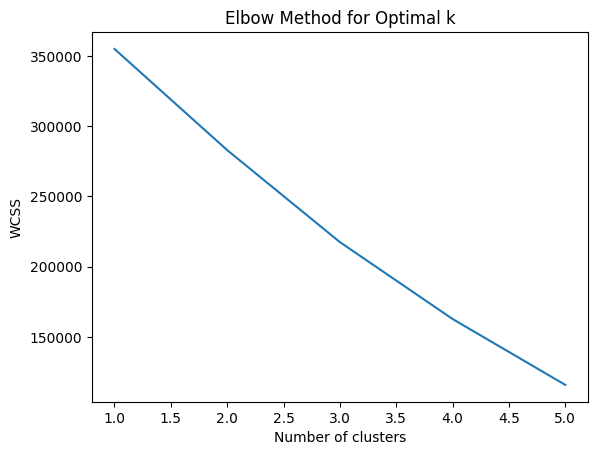

In [ ]:
# Using the Elbow Method to find the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
agg_result['Cluster'] = kmeans.fit_predict(X_scaled)


<Axes: >

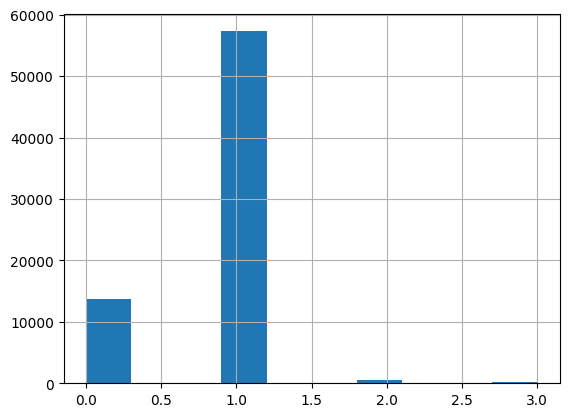

In [ ]:
agg_result['Cluster'].hist()

In [ ]:
import seaborn as sns

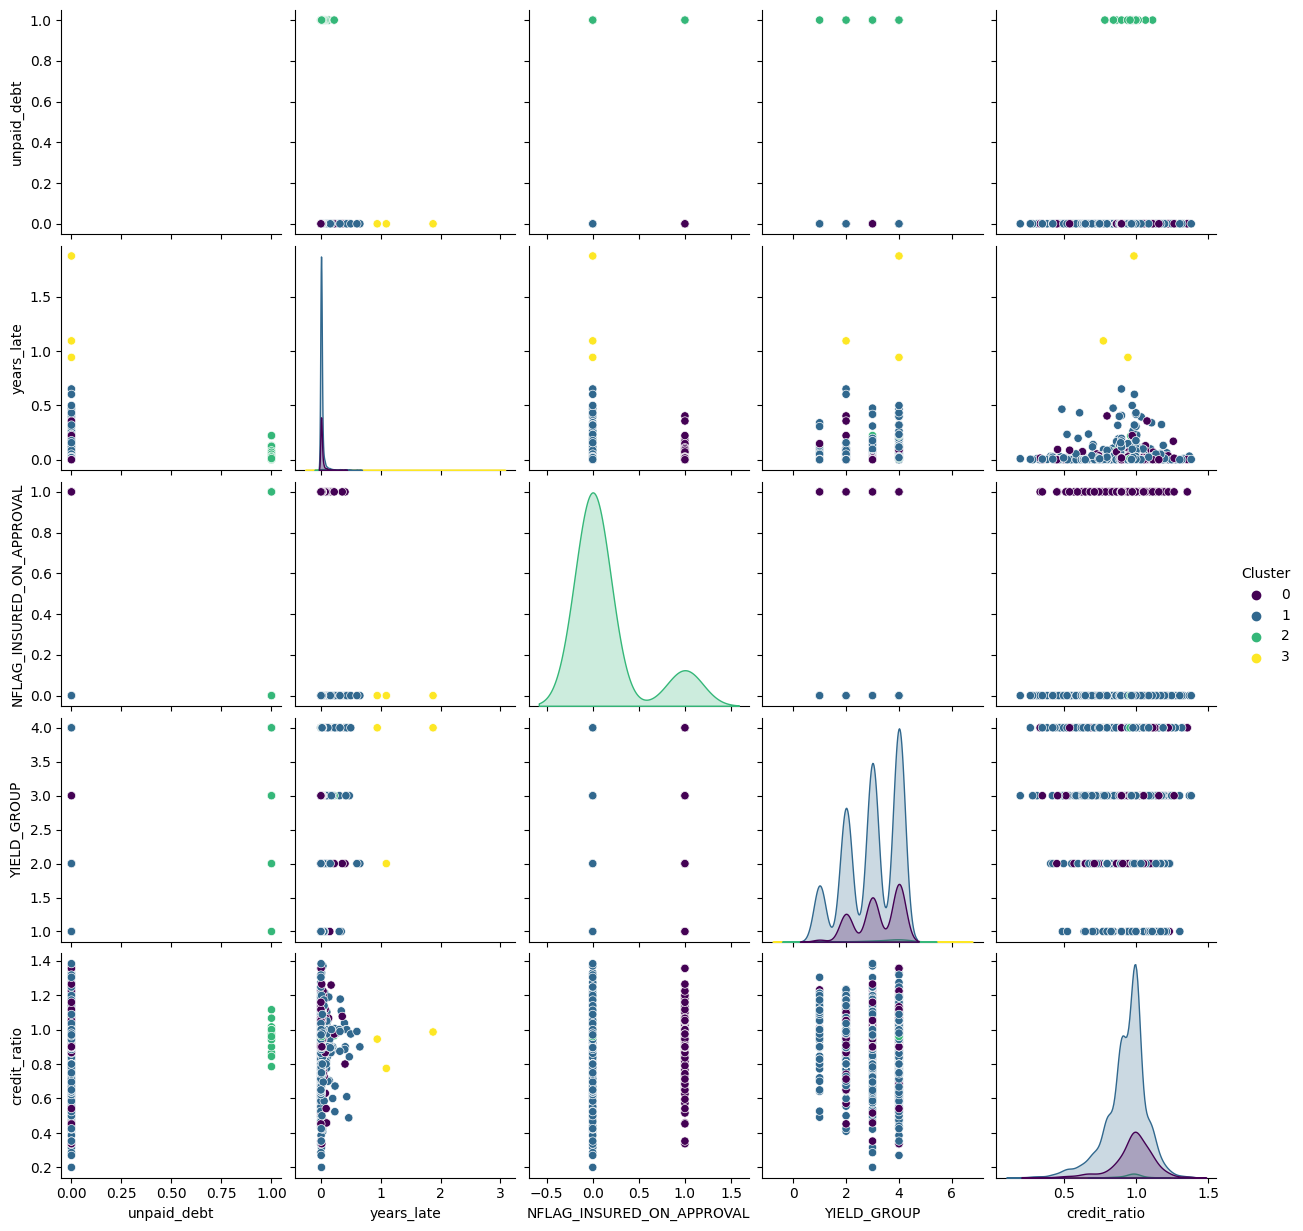

In [ ]:
sns.pairplot(agg_result[['Cluster','unpaid_debt','years_late','NFLAG_INSURED_ON_APPROVAL','YIELD_GROUP','credit_ratio']].sample(2000), hue='Cluster', palette='viridis')


# **Analisis Training Data**

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dataset (CSV)/train.csv", sep =",")

In [ ]:
train.shape

(61503, 23)

<ipython-input-187-d660d784a886>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)


<Axes: >

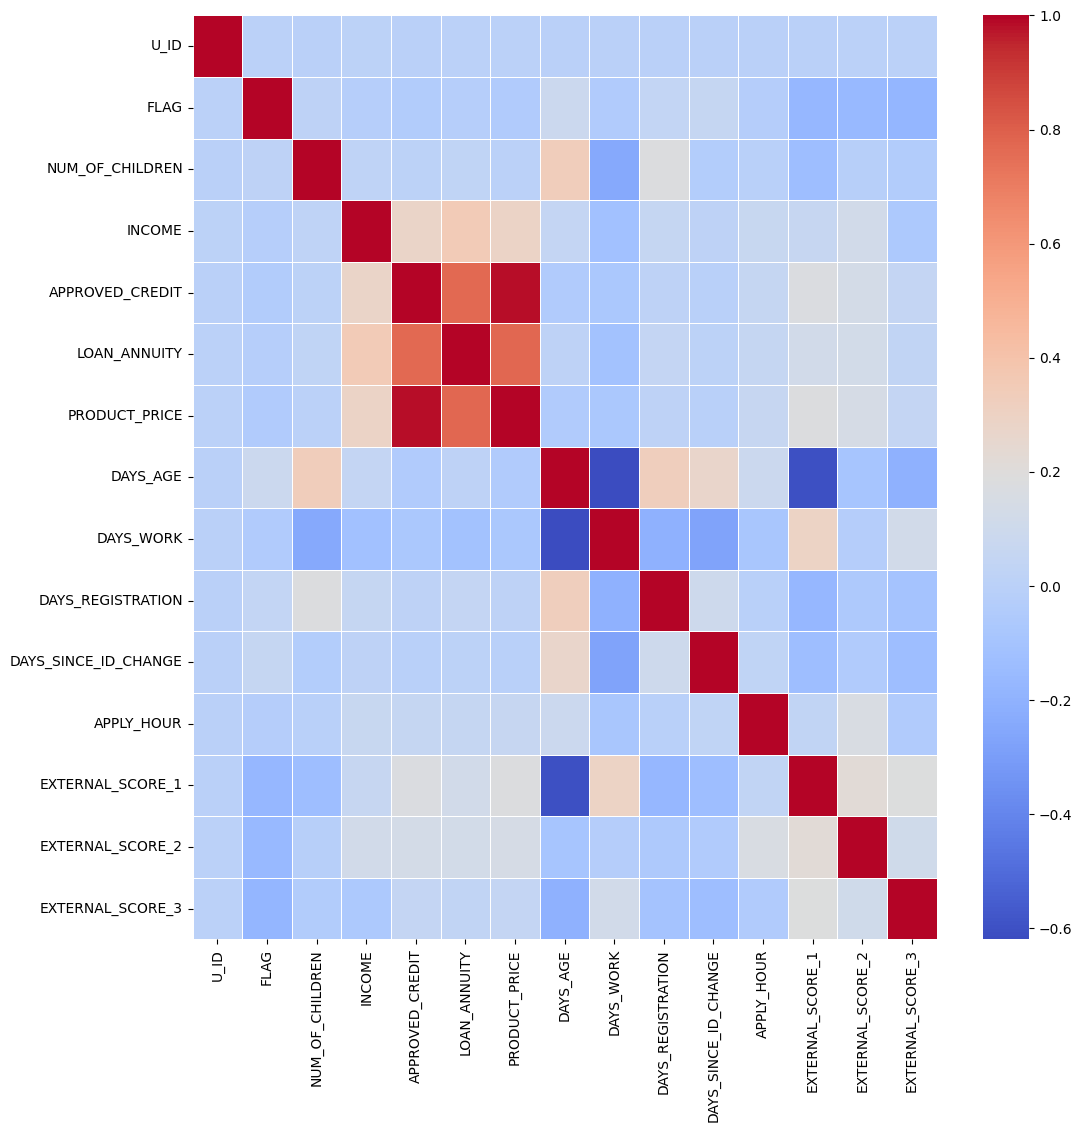

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [ ]:
train['credit_ratio'] = train['APPROVED_CREDIT']/train['PRODUCT_PRICE']
train['credit_ratio'] = train['credit_ratio'].replace(np.inf,1)
train['credit_ratio'] = train['credit_ratio'].fillna(1)

In [ ]:
train = train.drop(columns=['EXTERNAL_SCORE_1', 'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3'])
train = train.drop(columns=['APPROVED_CREDIT', 'PRODUCT_PRICE', 'LOAN_ANNUITY'])
train = train.drop(columns=['DAYS_REGISTRATION','APPLY_HOUR'])

* Feature engineer tiga variabel ttg duit Approved Credit, Loan_annuity, Product Price -> Credit Ratio, buang ketiganya
* Days age sama work, meskipun ada korelasi, keliatannya penting.

In [ ]:
# Missing Data
total = train.isnull().sum().sort_values(ascending = False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total Missing Data', 'Percentage Missing Data'])
missing_data.head(7)

,Total Missing Data,Percentage Missing Data
U_ID,0,0.0
FLAG,0,0.0
CONTRACT_TYPE,0,0.0
GENDER,0,0.0
NUM_OF_CHILDREN,0,0.0
INCOME,0,0.0
INCOME_CATEGORY,0,0.0


In [ ]:
numerical_features = train.select_dtypes(include=['number']).columns
categorical_features = train.select_dtypes(include=['object']).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 8
Categorical features : 8


In [ ]:
# Since FLAG variable is basically an categorical variable (1 - client with late payment more than X days, 0 - all other cases), we decided to change it to 'object' using astype.
# Convert FLAG to object type in train_num
train_num['FLAG'] = train_num['FLAG'].astype('object')

# Move FLAG to train_cat DataFrame
train_cat['FLAG'] = train_num['FLAG']

# Drop FLAG from train_num DataFrame
train_num = train_num.drop('FLAG', axis=1)

<ipython-input-192-c74b6c9ef4a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['FLAG'] = train_num['FLAG'].astype('object')
<ipython-input-192-c74b6c9ef4a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat['FLAG'] = train_num['FLAG']


### Numerical

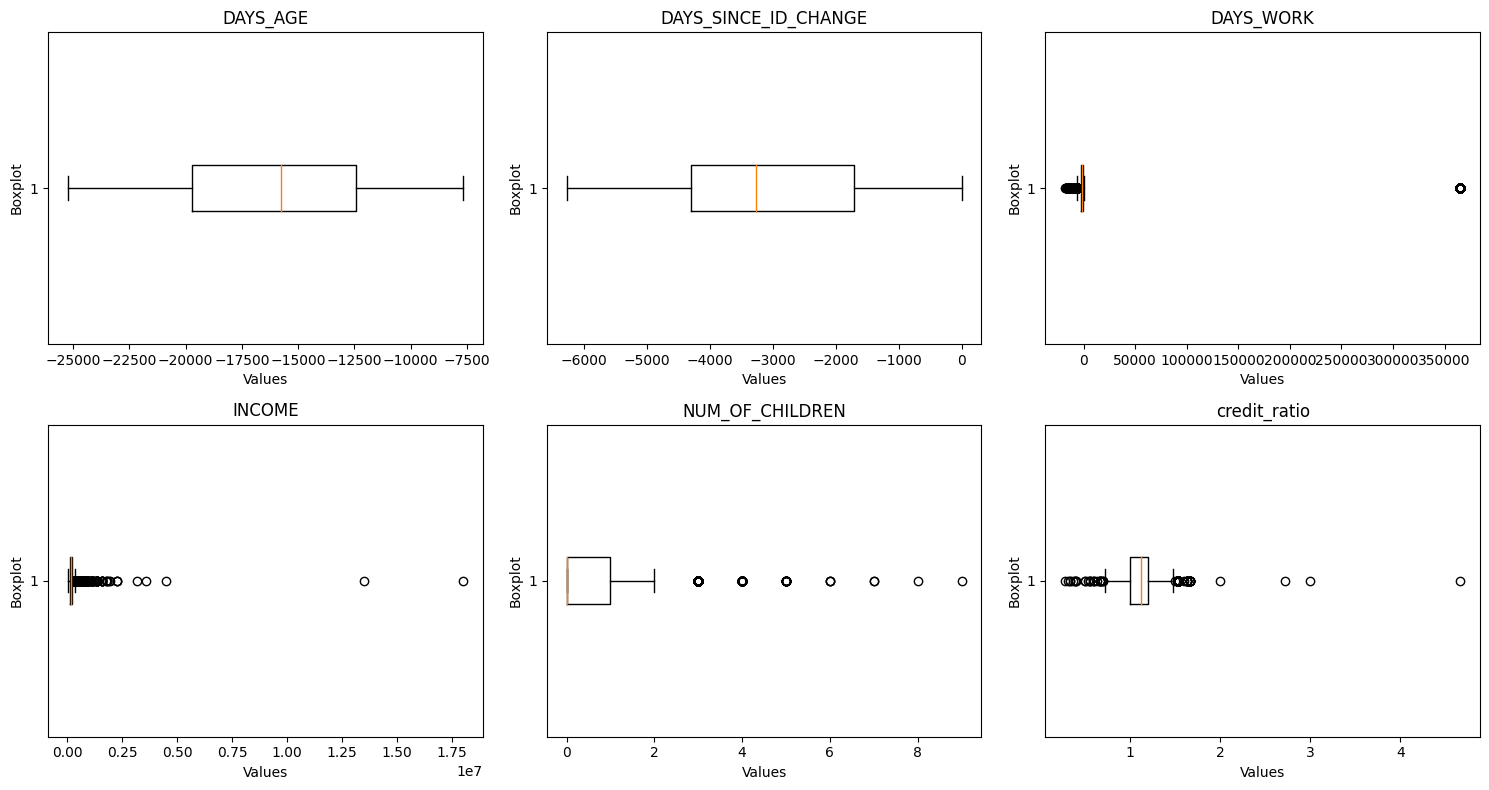

In [ ]:
# U_ID is the column we want to exclude from boxplots
exclude_column = 'U_ID'

# Select only numerical columns (excluding U_ID)
numerical_columns = train_num.select_dtypes(include='number').columns.difference([exclude_column])

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].boxplot(train_num[column], vert=False)
    axes[row_idx, col_idx].set_title(column)
    axes[row_idx, col_idx].set_xlabel('Values')
    axes[row_idx, col_idx].set_ylabel('Boxplot')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

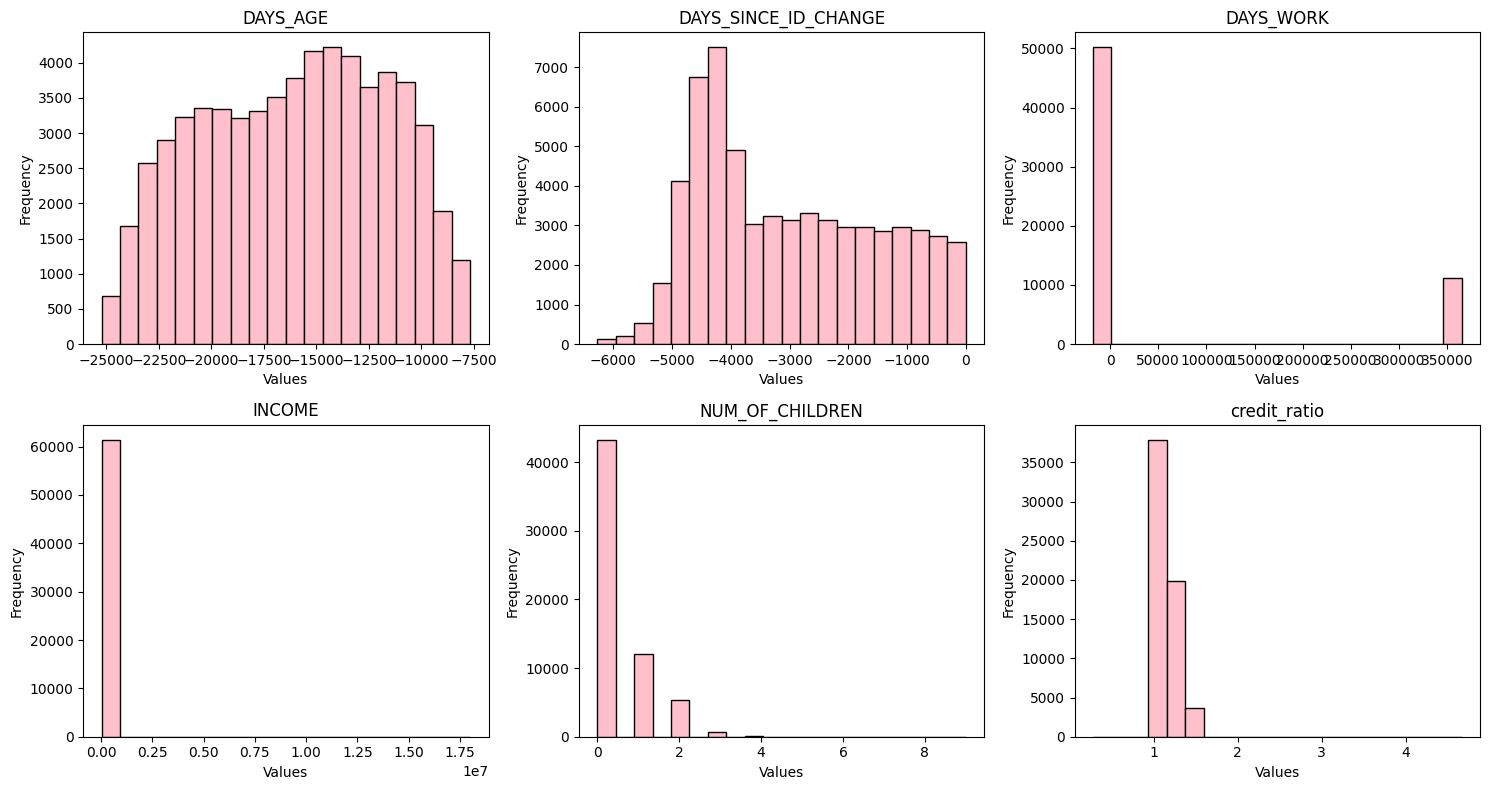

In [ ]:
# U_ID is the column we want to exclude from histograms
exclude_column = 'U_ID'

# Select only numerical columns (excluding U_ID)
numerical_columns = train_num.select_dtypes(include='number').columns.difference([exclude_column])

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].hist(train_num[column], bins=20, edgecolor='black', alpha=1, color='pink')
    axes[row_idx, col_idx].set_title(column)
    axes[row_idx, col_idx].set_xlabel('Values')
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [ ]:
# Client's age in years at the time of application
train_num['YEARS_AGE'] = -train_num['DAYS_AGE'] / 365
# How many years before the application the person started current job
train_num['YEARS_WORK'] = -train_num['DAYS_WORK'] / 365
# How many years before the application did client change the identity document with which he applied for the loan
train_num['YEARS_SINCE_ID_CHANGE'] = -train_num['DAYS_SINCE_ID_CHANGE'] / 365
train_num = train_num.drop(columns=['DAYS_AGE', 'DAYS_WORK', 'DAYS_SINCE_ID_CHANGE'])

### Categorical

In [ ]:
# ORGANIZATION CATEGORY has too many categories (58)
train_cat.drop(columns = 'ORGANIZATION_CATEGORY', inplace = True)
train_cat.drop(columns = 'APPLY_DAYS', inplace = True)

<ipython-input-196-d36bffce9c4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(columns = 'ORGANIZATION_CATEGORY', inplace = True)
<ipython-input-196-d36bffce9c4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(columns = 'APPLY_DAYS', inplace = True)


In [ ]:
train_cat.nunique()

CONTRACT_TYPE       2
GENDER              2
INCOME_CATEGORY     7
EDUCATION           5
FAMILY_STATUS       5
HOUSING_CATEGORY    6
FLAG                2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode_columns = ['CONTRACT_TYPE', 'GENDER', 'FLAG']
one_hot_encode_columns = ['INCOME_CATEGORY', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_CATEGORY']

# Apply label encoding
label_encoder = LabelEncoder()

# GENDER(0: FEMALE, 1: MALE)
# CONTRACT_TYPE (1: Revolving loans, 0: Cash loans)
for column in label_encode_columns:
    train_cat[column] = label_encoder.fit_transform(train_cat[column])

# Apply one-hot encoding
train_cat_encoded = pd.get_dummies(train_cat, columns=one_hot_encode_columns, drop_first=True)

<ipython-input-198-53f9d45db1dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat[column] = label_encoder.fit_transform(train_cat[column])
<ipython-input-198-53f9d45db1dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat[column] = label_encoder.fit_transform(train_cat[column])
<ipython-input-198-53f9d45db1dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
train = pd.concat([train_num, train_cat_encoded], axis=1)

In [ ]:
outlier_threshold = 0

# Identify and count rows with outliers
outliers = train[train['YEARS_WORK'] < outlier_threshold]
num_outliers = outliers.shape[0]

print(f'Number of rows with outliers in YEARS_WORK: {num_outliers}')

# Remove rows with outliers
train = train[train['YEARS_WORK'] >= outlier_threshold]

Number of rows with outliers in YEARS_WORK: 11253


In [ ]:
train = train[train['INCOME']<500000]

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Extract numerical columns
numerical_standardized = ['NUM_OF_CHILDREN', 'INCOME', 'YEARS_AGE', 'YEARS_WORK','YEARS_SINCE_ID_CHANGE']

# Standardize numerical columns
scaler = MinMaxScaler()

train[numerical_standardized] = scaler.fit_transform(train[numerical_standardized])

<ipython-input-202-e0605c8ef42e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numerical_standardized] = scaler.fit_transform(train[numerical_standardized])


In [ ]:
# Missing Data
total = train_num.isnull().sum().sort_values(ascending = False)
percentage = (train_num.isnull().sum()/train_num.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total Missing Data', 'Percentage Missing Data'])
missing_data.head(7)

,Total Missing Data,Percentage Missing Data
U_ID,0,0.0
NUM_OF_CHILDREN,0,0.0
INCOME,0,0.0
credit_ratio,0,0.0
YEARS_AGE,0,0.0
YEARS_WORK,0,0.0
YEARS_SINCE_ID_CHANGE,0,0.0


In [ ]:
train.head()

,U_ID,NUM_OF_CHILDREN,INCOME,credit_ratio,YEARS_AGE,YEARS_WORK,YEARS_SINCE_ID_CHANGE,CONTRACT_TYPE,GENDER,FLAG,...,EDUCATION_Secondary / secondary special,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_CATEGORY_House / apartment,HOUSING_CATEGORY_Municipal apartment,HOUSING_CATEGORY_Office apartment,HOUSING_CATEGORY_Rented apartment,HOUSING_CATEGORY_With parents
0,333538,0.111111,0.086538,1.000000,0.220574,0.051259,0.439433,1,0,0,...,1,1,0,0,0,0,0,0,0,1
1,406644,0.111111,0.375000,1.118799,0.460432,0.250098,0.391297,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,411997,0.000000,0.423077,1.198000,0.740914,0.583617,0.639146,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,241559,0.000000,0.230769,1.000000,0.076453,0.066280,0.262034,1,1,0,...,1,0,0,1,0,1,0,0,0,0
5,296530,0.222222,0.230769,1.316800,0.161009,0.041376,0.024227,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# **Penggabungan Training Data dengan Kluster**

In [ ]:
agg_result

,U_ID,unpaid_debt,years_late,credit_ratio,NFLAG_INSURED_ON_APPROVAL,YIELD_GROUP,Cluster
0,100009,0,0.000000,0.839583,0.0,3,1
1,100039,0,0.000000,1.049371,1.0,4,0
2,100044,0,0.006164,0.947522,0.0,3,1
3,100045,0,0.006849,0.912612,0.0,4,1
4,100046,0,0.000000,1.208627,1.0,2,0
...,...,...,...,...,...,...,...
71735,456247,0,0.007534,0.936992,0.0,2,1
71736,456248,0,0.022831,1.049550,1.0,4,0
71737,456249,0,0.000000,1.066000,0.0,4,1
71738,456252,0,0.008219,0.986561,1.0,2,0


In [ ]:
final_df = pd.merge(train, agg_result[['Cluster','U_ID']], on='U_ID', how='inner')

In [ ]:
final_df

,U_ID,NUM_OF_CHILDREN,INCOME,credit_ratio,YEARS_AGE,YEARS_WORK,YEARS_SINCE_ID_CHANGE,CONTRACT_TYPE,GENDER,FLAG,...,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_CATEGORY_House / apartment,HOUSING_CATEGORY_Municipal apartment,HOUSING_CATEGORY_Office apartment,HOUSING_CATEGORY_Rented apartment,HOUSING_CATEGORY_With parents,Cluster
0,333538,0.111111,0.086538,1.000000,0.220574,0.051259,0.439433,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,406644,0.111111,0.375000,1.118799,0.460432,0.250098,0.391297,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,411997,0.000000,0.423077,1.198000,0.740914,0.583617,0.639146,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,241559,0.000000,0.230769,1.000000,0.076453,0.066280,0.262034,1,1,0,...,0,0,1,0,1,0,0,0,0,1
4,296530,0.222222,0.230769,1.316800,0.161009,0.041376,0.024227,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46809,395312,0.222222,0.278846,1.198000,0.275404,0.054107,0.615556,0,1,1,...,0,0,1,0,0,0,0,1,0,1
46810,312885,0.000000,0.326923,1.158397,0.696069,0.023899,0.418075,0,0,0,...,0,0,1,0,1,0,0,0,0,1
46811,131041,0.222222,0.067308,1.099000,0.301250,0.106818,0.529009,0,0,0,...,1,0,0,0,1,0,0,0,0,1
46812,251159,0.222222,0.711538,1.000000,0.376277,0.324418,0.431782,0,1,0,...,1,0,0,0,1,0,0,0,0,1


array([[<Axes: title={'center': 'Cluster'}>]], dtype=object)

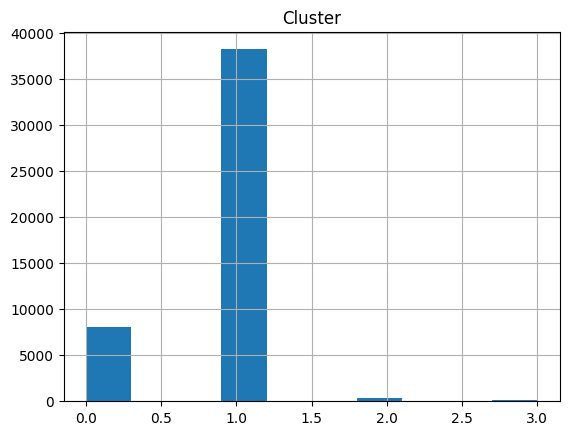

In [ ]:
final_df[['Cluster']].hist()

In [ ]:
pip install -U imbalanced-learn

In [ ]:
final_df.columns

Index(['U_ID', 'NUM_OF_CHILDREN', 'INCOME', 'credit_ratio', 'YEARS_AGE',
       'YEARS_WORK', 'YEARS_SINCE_ID_CHANGE', 'CONTRACT_TYPE', 'GENDER',
       'FLAG', 'INCOME_CATEGORY_Commercial associate',
       'INCOME_CATEGORY_Pensioner', 'INCOME_CATEGORY_State servant',
       'INCOME_CATEGORY_Student', 'INCOME_CATEGORY_Unemployed',
       'INCOME_CATEGORY_Working', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'HOUSING_CATEGORY_House / apartment',
       'HOUSING_CATEGORY_Municipal apartment',
       'HOUSING_CATEGORY_Office apartment',
       'HOUSING_CATEGORY_Rented apartment', 'HOUSING_CATEGORY_With parents',
       'Cluster'],
      dtype='object')

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Splitting the data into X (features) and y (target variable)
X = final_df.drop(['Cluster','U_ID'], axis=1) # Features
y = final_df['Cluster'] # Target variable

# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

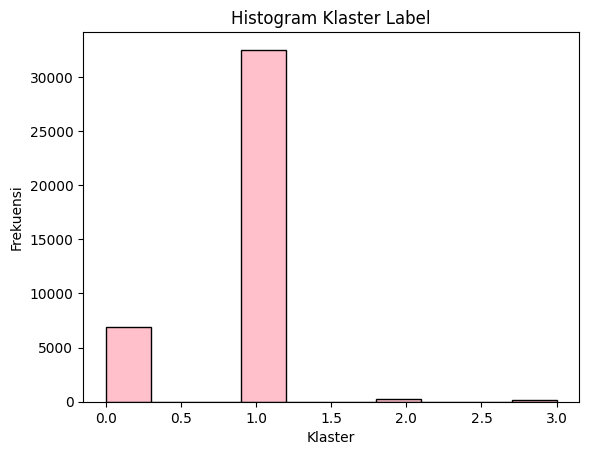

In [ ]:
plt.hist(y_train, color='pink', edgecolor='black')
plt.title('Histogram Klaster Label')
plt.xlabel('Klaster')
plt.ylabel('Frekuensi')
plt.show()

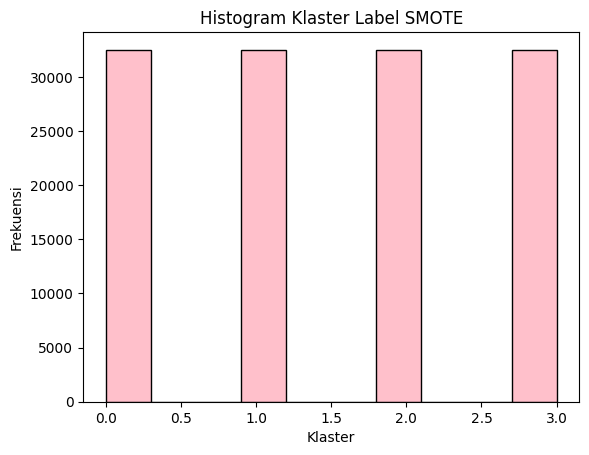

In [ ]:
plt.hist(y_resampled, color='pink', edgecolor='black')
plt.title('Histogram Klaster Label SMOTE')
plt.xlabel('Klaster')
plt.ylabel('Frekuensi')
plt.show()

# **Pemodelan Data**

Accuracy on the test set: 0.7419906023067065

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.17      0.20      1213
           1       0.83      0.87      0.85      5738
           2       0.02      0.02      0.02        52
           3       0.00      0.00      0.00        20

    accuracy                           0.74      7023
   macro avg       0.27      0.27      0.27      7023
weighted avg       0.72      0.74      0.73      7023



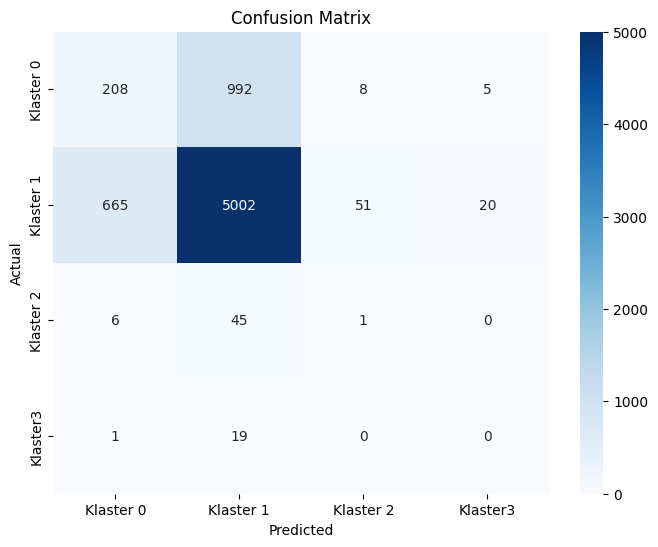

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Then train your model on the resampled data
rf_model.fit(X_resampled, y_resampled)

# Step 3: Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'],
            yticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

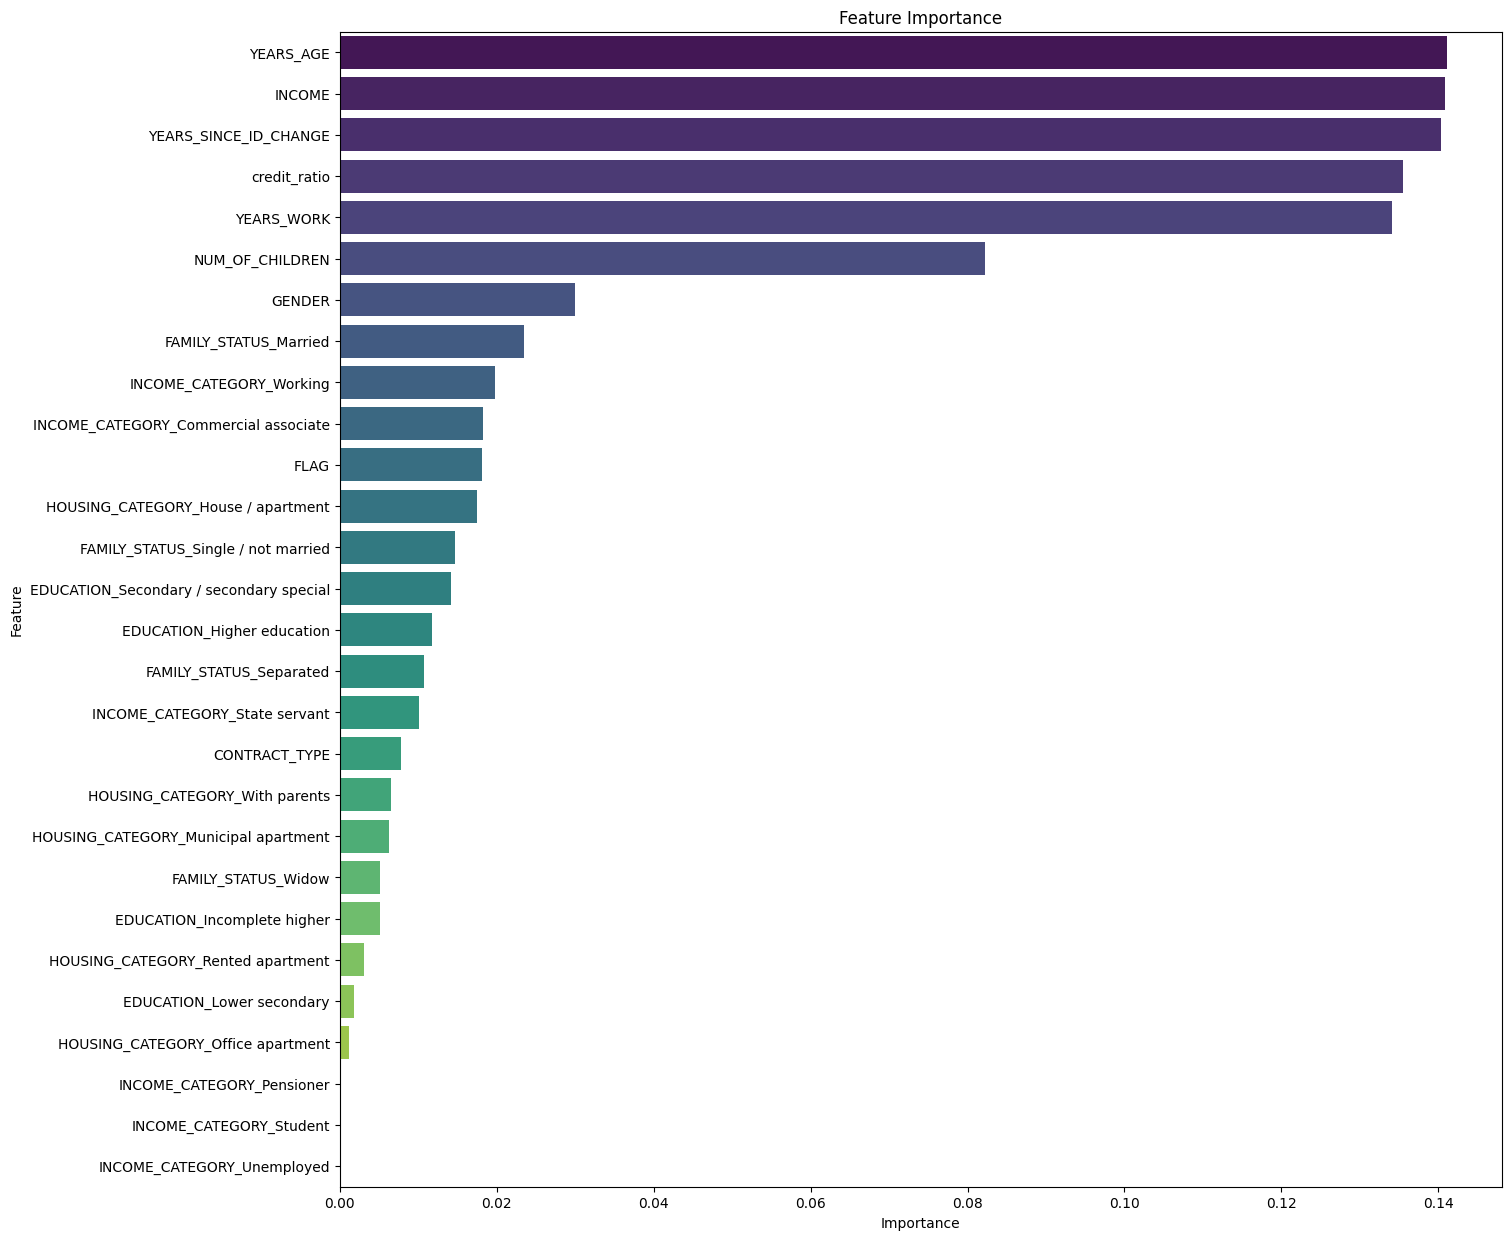

In [ ]:
# Step 5: Display feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(15, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 130040, number of used features: 25
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Accuracy on the test set: 0.7728890787412787

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.08      0.12      1213
           1       0.82      0.93      0.87      5738
           2       0.03      0.04      0.03        52
           3       0.00      0.00      0.00        20

    accu

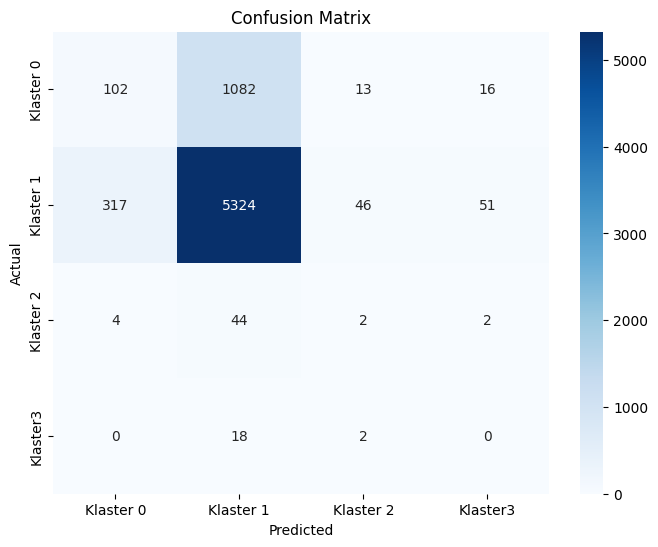

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()
rf_model = LGBMClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_resampled, y_resampled)

# Step 3: Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'],
            yticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on the test set: 0.762637049693863

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.12      0.17      1213
           1       0.83      0.91      0.86      5738
           2       0.01      0.02      0.02        52
           3       0.00      0.00      0.00        20

    accuracy                           0.76      7023
   macro avg       0.27      0.26      0.26      7023
weighted avg       0.72      0.76      0.74      7023



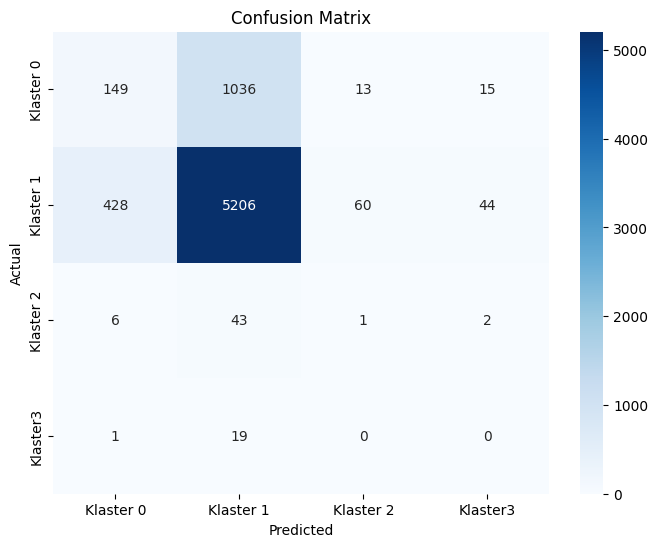

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()
rf_model = XGBClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_resampled, y_resampled)

# Step 3: Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'],
            yticklabels=['Klaster 0', 'Klaster 1','Klaster 2','Klaster3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/5
995/995 [==============================] - 8s 7ms/step - loss: 0.5431 - accuracy: 0.8114 - val_loss: 0.5093 - val_accuracy: 0.8205
Epoch 2/5
995/995 [==============================] - 6s 6ms/step - loss: 0.5134 - accuracy: 0.8162 - val_loss: 0.5111 - val_accuracy: 0.8205
Epoch 3/5
995/995 [==============================] - 5s 5ms/step - loss: 0.5122 - accuracy: 0.8162 - val_loss: 0.5074 - val_accuracy: 0.8205
Epoch 4/5
995/995 [==============================] - 10s 10ms/step - loss: 0.5115 - accuracy: 0.8162 - val_loss: 0.5066 - val_accuracy: 0.8205
Epoch 5/5
220/220 [==============================] - 0s 1ms/step
Accuracy on the test set: 0.817029759362096

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1213
           1       0.82      1.00      0.90      5738
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        20

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


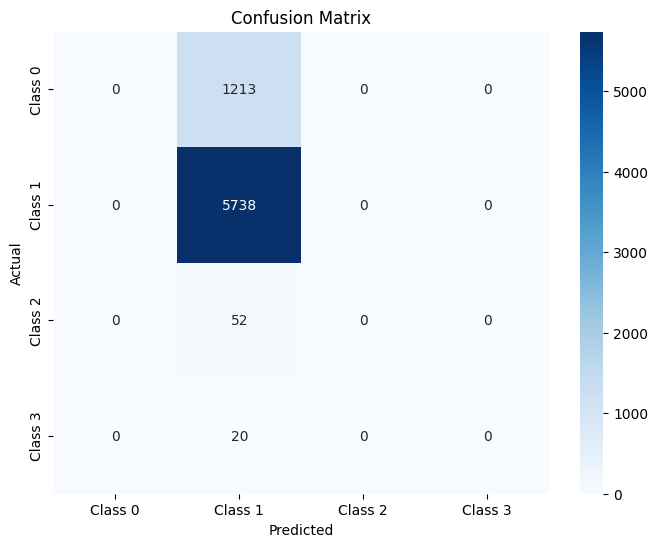

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 3 output neurons for 3 classes, softmax for multi-class classification

# Step 3: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# Step 6: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on the test set (Decision Tree): 0.6275096112772319

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.20      0.30      0.24      1213
           1       0.83      0.70      0.76      5738
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        20

    accuracy                           0.63      7023
   macro avg       0.26      0.25      0.25      7023
weighted avg       0.71      0.63      0.66      7023



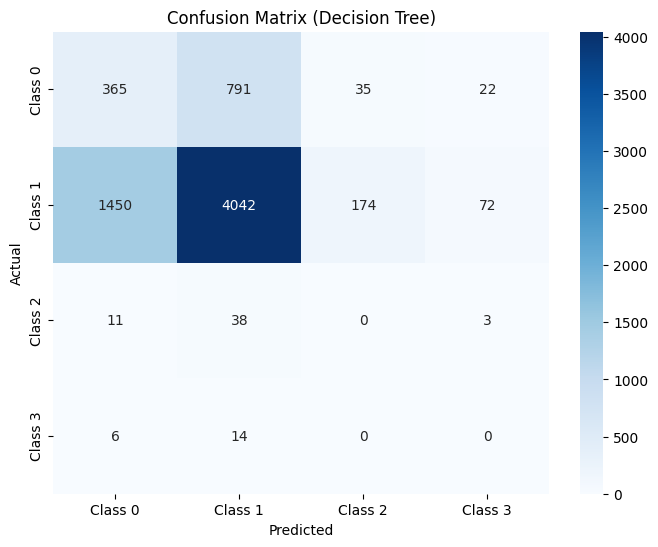

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the resampled data
dt_model.fit(X_resampled, y_resampled)

# Step 3: Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy on the test set (Decision Tree):", accuracy_dt)

class_report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report (Decision Tree):\n", class_report_dt)

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on the test set (Logistic Regression): 0.4144952299587071

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.24      0.32      0.27      1213
           1       0.87      0.44      0.58      5738
           2       0.01      0.23      0.02        52
           3       0.01      0.35      0.01        20

    accuracy                           0.41      7023
   macro avg       0.28      0.33      0.22      7023
weighted avg       0.75      0.41      0.52      7023



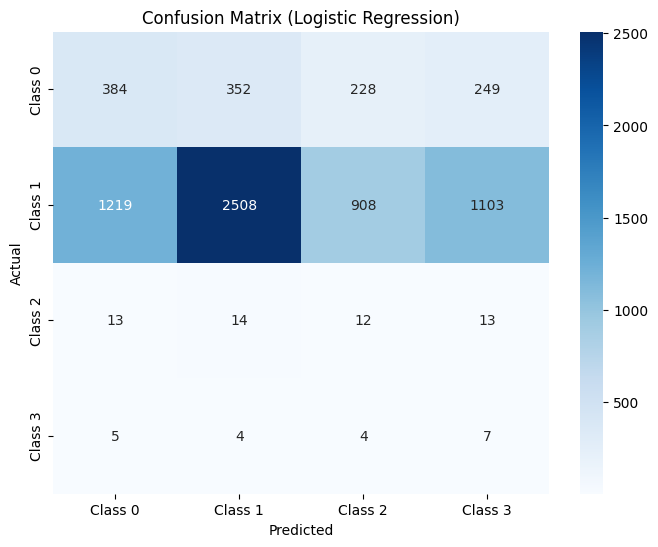

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Instantiate the Logistic Regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Step 2: Train the model on the resampled data
logreg_model.fit(X_resampled, y_resampled)

# Step 3: Making predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Step 4: Evaluating the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy on the test set (Logistic Regression):", accuracy_logreg)

class_report_logreg = classification_report(y_test, y_pred_logreg)
print("\nClassification Report (Logistic Regression):\n", class_report_logreg)

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plotting the Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on the test set (AdaBoost): 0.5178698561868148

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.20      0.31      0.24      1213
           1       0.85      0.57      0.68      5738
           2       0.01      0.10      0.01        52
           3       0.00      0.15      0.01        20

    accuracy                           0.52      7023
   macro avg       0.27      0.28      0.24      7023
weighted avg       0.73      0.52      0.60      7023



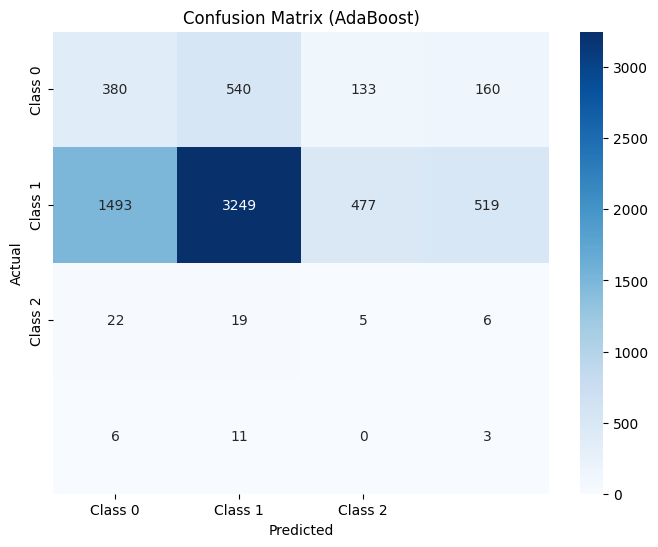

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoost model
ada_model = AdaBoostClassifier()

# Train the model on the resampled data
ada_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluating the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy on the test set (AdaBoost):", accuracy_ada)

class_report_ada = classification_report(y_test, y_pred_ada)
print("\nClassification Report (AdaBoost):\n", class_report_ada)

# Confusion Matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Plotting the Confusion Matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
